In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
data = pd.read_csv('iris.csv')
data.set_index('Id', inplace=True)
features = data[['PetalLengthCm', 'PetalWidthCm']]
target = data[['Species']]

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(features)
features.iloc[:, 0] = scaled[:,0]
features.iloc[:, 1] = scaled[:,1]
features.head()

,PetalLengthCm,PetalWidthCm
Id,,
1,-1.341272,-1.312977
2,-1.341272,-1.312977
3,-1.398138,-1.312977
4,-1.284407,-1.312977
5,-1.341272,-1.312977


In [25]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
encoder = LabelEncoder()
target.iloc[:,0] = encoder.fit_transform(target)
target

,Species
Id,
1,0
2,0
3,0
4,0
5,0
...,...
146,2
147,2
148,2


In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.3, random_state=42
)

# Modeling

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtrain, ytrain)

KNeighborsClassifier()

In [28]:
ypred = model.predict(xtest)
ypred == ytest.values.ravel()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [29]:
from sklearn. metrics import accuracy_score, confusion_matrix, f1_score
accuracy_score(ytest, ypred), confusion_matrix(ytest, ypred)

(1.0,
 array([[19,  0,  0],
        [ 0, 13,  0],
        [ 0,  0, 13]], dtype=int64))

In [30]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model, features, target)
cv, cv.mean()

(array([1.        , 0.96666667, 0.93333333, 0.93333333, 1.        ]),
 0.9666666666666668)

In [31]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [32]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    model, param_grid={
        'n_neighbors': [5,7,9,11,14,15,17,19],
        'algorithm': ['ball-tree', 'kd-tree', 'brute'],
        'metric': ['minkowski', 'euclidean', 'manhattan', 'hamming', 'chebyshev'],
        'weights': ['uniform', 'distance']
    }, cv=10, scoring='accuracy'
)
grid.fit(features, target)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball-tree', 'kd-tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'hamming', 'chebyshev'],
                         'n_neighbors': [5, 7, 9, 11, 14, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [33]:
grid.best_params_

{'algorithm': 'brute',
 'metric': 'minkowski',
 'n_neighbors': 5,
 'weights': 'uniform'}

In [34]:
best_model = grid.best_estimator_
best_model

KNeighborsClassifier(algorithm='brute')

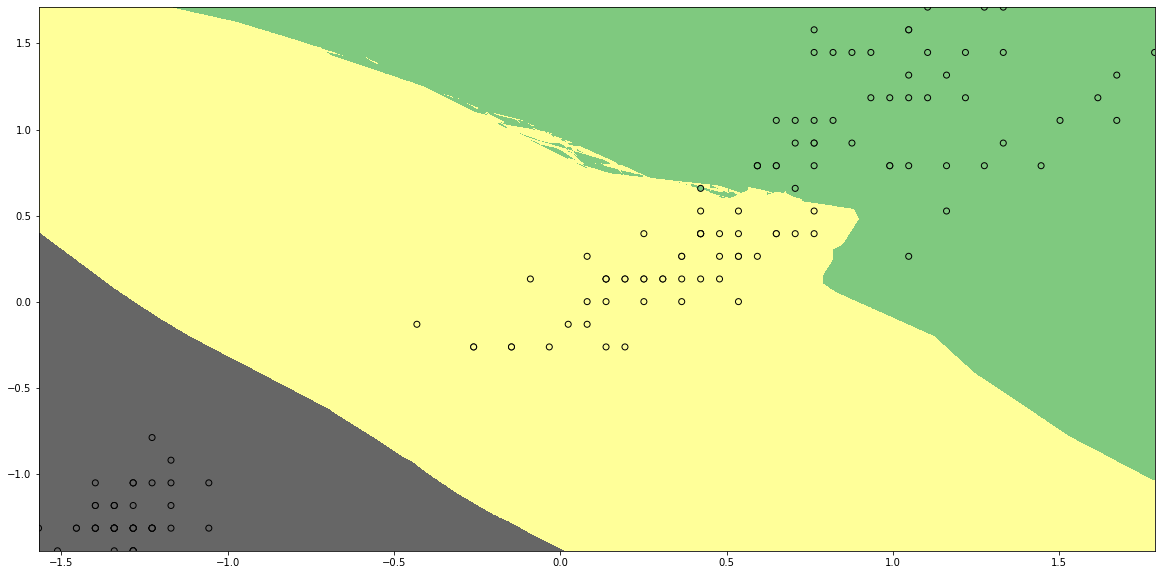

In [35]:
xmin, xmax = features.PetalLengthCm.values.min(), features.PetalLengthCm.values.max()
ymin, ymax = features.PetalWidthCm.values.min(), features.PetalWidthCm.values.max()

xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.001), np.arange(ymin, ymax, 0.001)
)

grid = np.c_[xx.ravel(), yy.ravel()]
y_pred = best_model.predict(grid)
y_pred = y_pred.reshape(yy.shape)

predictions = best_model.predict(features)

plt.figure(1, figsize=(20, 10))
plt.set_cmap(plt.cm.Accent_r)
plt.pcolormesh(xx, yy, y_pred)
plt.scatter(features.PetalLengthCm, features.PetalWidthCm, c=predictions, edgecolors='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

[https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier]

# Distance 
! [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric]